In [71]:
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import random

from scipy.stats import poisson, powerlaw, norm

In [80]:
def fetch_parametrs(index):
    match index:
        case "1":
            return 256,0.005
        case "2":
            return 512,0.05
        case "3":
            return 1024,0.1
        case _:
            return 0.0,0.0

def graph_summary(graph,graph_name):
    # print(graph)
    radius = nx.radius(graph) if nx.is_connected(graph) else np.inf
    diameter = nx.diameter(graph) if nx.is_connected(graph) else np.inf
    # print("Maksymaly stopien grafu: {}".format(np.max(nx.degree(graph))))
    # print("Sredni stopien grafu: {}".format(np.mean(nx.degree(graph))))
    graph_type = graph_name[:1]
    # print(graph_type)
    histo_data = [degree for _,degree in graph.degree()]
    plt.title(f"{graph_name} - Promien: {radius}, Srednica: {diameter}")
    plt.ylabel("Node count")
    plt.xlabel("Node degree")
    plt.hist(histo_data,bins=50)
    if graph_type == "b":
        a,loc,scale = powerlaw.fit(histo_data,floc=0)
        x = np.linspace(min(histo_data), max(histo_data), 100)
        y = powerlaw.pdf(x, a, loc, scale) * (np.max(histo_data)-np.min(histo_data)) * len(histo_data) / 10.0
        plt.plot(x,y)
    elif graph_type == "w":
        mean = np.mean(histo_data)
        std = np.std(histo_data)
        x = np.linspace(min(histo_data),max(histo_data),100)
        y = norm.pdf(x,mean,std) * len(histo_data) * (np.max(histo_data) - np.min(histo_data)) / 20.0
        plt.plot(x,y)
    else:
        graph_index = graph_name[5]
        graph_size, probality = fetch_parametrs(graph_index)
        lamb = probality*(graph_size-1)
        x = np.arange(min(histo_data),max(histo_data)+1)
        y = poisson.pmf(x,lamb) * graph_size
        plt.plot(x,y)
    plt.savefig(f"{graph_name}")
    plt.show()

In [73]:
def draw_graph(graph):
    nx.draw_spring(graph,node_size=0.1)
    plt.show()

In [74]:
def create_barabasi_albert(initial_nodes,new_nodes,limit_edge):
    graph = nx.complete_graph(initial_nodes)
    for i in range(new_nodes):
        new_node = initial_nodes + i
        graph.add_node(new_node)
        degrees = [degree for node,degree in graph.degree()]
        targets = random.choices(list(graph.nodes),weights=degrees,k=limit_edge)
        for t in targets:
            graph.add_edge(new_node,t)
    return graph

In [75]:
def create_erdos_renyi(vertices, chance):
    graph = nx.Graph()
    graph.add_nodes_from(range(vertices))
    for node1 in range(len(graph)):
        for node2 in range(node1+1,vertices):
            if node1 == node2:
                continue
            if chance > np.random.random():
                graph.add_edge(node1,node2)
            
    return graph

In [76]:

def create_watts_strogats(node_count,near_neighbours_count,probality):
    graph = nx.Graph()
    graph.add_nodes_from(range(node_count))
    for node in range(len(graph)):
        for offset in range(-near_neighbours_count,near_neighbours_count+1):
            if offset == 0:
                continue
            graph.add_edge(node,(node+offset)%node_count)
    for node_index in range(len(graph)):
        for offset in range(-near_neighbours_count,near_neighbours_count+1):
            if offset == 0:
                continue
            if probality > np.random.random() and graph.has_edge(node_index,(node_index+offset)%node_count):
                graph.remove_edge(node_index,(node_index+offset)%node_count)
                new_connection = random.choice(range(len(graph)))
                graph.add_edge(node_index,new_connection)
    return graph

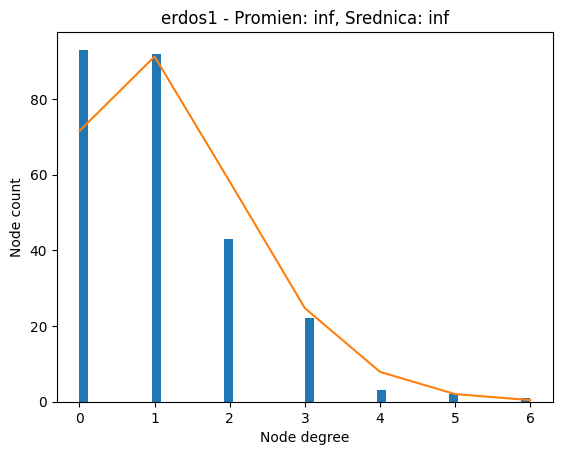

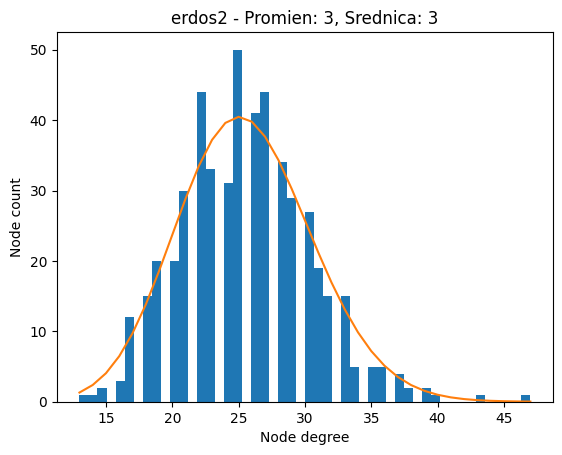

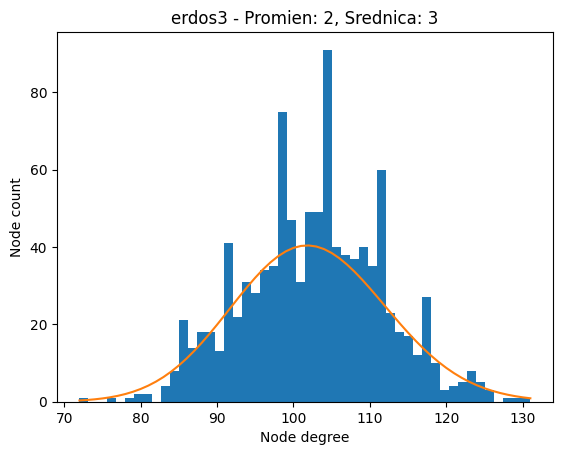

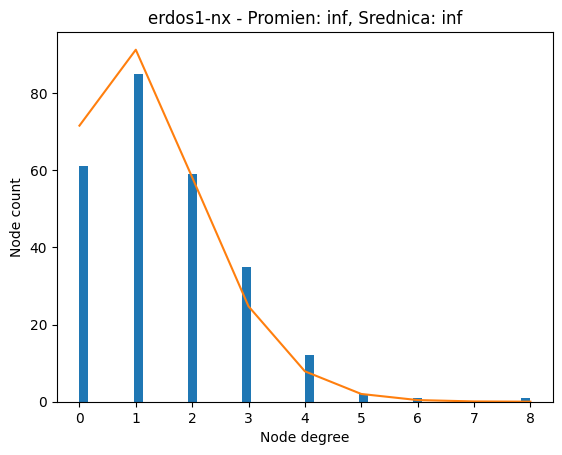

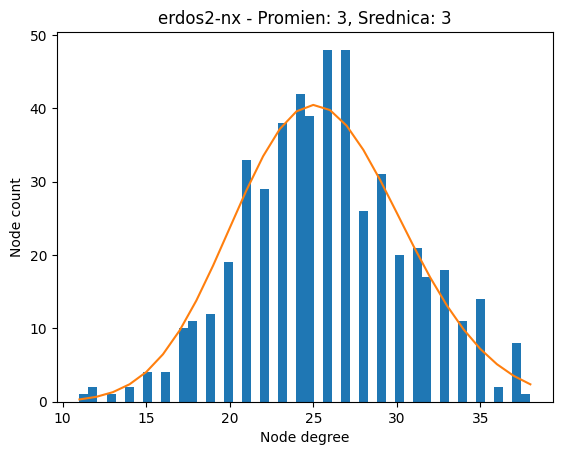

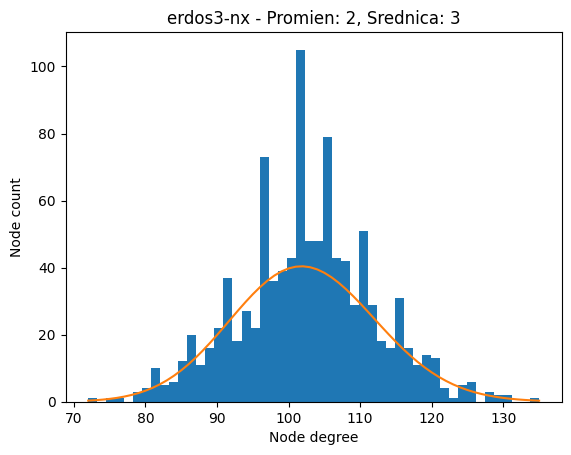

In [ ]:
all_graphs = {
    
    "erdos1" : create_erdos_renyi(256,0.005), 
    "erdos2" : create_erdos_renyi(512,0.05),
    "erdos3" : create_erdos_renyi(1024,0.1),
    "watts1" : create_watts_strogats(256,2,0.05),
    "watts2" : create_watts_strogats(512,4,0.1),
    "watts3" : create_watts_strogats(1024,8,0.15),
    "barabasi1" : create_barabasi_albert(4,256-4,8),
    "barabasi2" : create_barabasi_albert(4,512-4,12),
    "barabasi3" : create_barabasi_albert(8,1024-8,16),
    
    "erdos1-nx" : nx.erdos_renyi_graph(256,0.005), 
    "erdos2-nx" : nx.erdos_renyi_graph(512,0.05),
    "erdos3-nx" : nx.erdos_renyi_graph(1024,0.1),
    "watts1-nx" : nx.watts_strogatz_graph(256,2,0.05),
    "watts2-nx" : nx.watts_strogatz_graph(512,4,0.1),
    "watts3-nx" : nx.watts_strogatz_graph(1024,8,0.15),
    "barabasi1-nx" : nx.barabasi_albert_graph(256,8),
    "barabasi2-nx" : nx.barabasi_albert_graph(512,12),
    "barabasi3-nx" : nx.barabasi_albert_graph(1024,16),

}
for graph_name in all_graphs:
    graph_summary(all_graphs[graph_name],graph_name)
    # draw_graph(all_graphs[graph_name])
    
